<a href="https://colab.research.google.com/github/marcelAnd02/MachineLearning/blob/master/Image_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_images, train_lab), (test_images, test_lab) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
def plot_image(image):
  plt.figure(figsize = (2, 2))
  plt.imshow(image, cmap = "binary")
  plt.axis("off")

In [4]:
def plot_multiple_images(images, num_img = 10, rows = 2, cols = 5):
  fig = plt.figure(figsize = (8, 4))
  for ind in range(1, num_img + 1):
    fig.add_subplot(rows, cols, ind)
    plt.imshow(images[ind - 1], cmap = "binary")
    plt.axis("off")

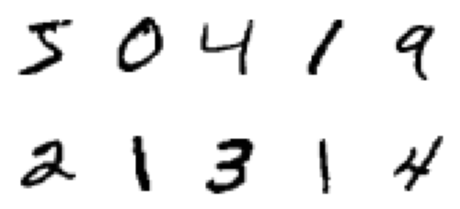

In [5]:
plot_multiple_images(train_images[0:10])

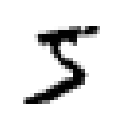

In [6]:
plot_image(train_images[0])

In [7]:
X = train_images / 255.

In [8]:
batch_size = 128
X_batch = tf.data.Dataset.from_tensor_slices(X).shuffle(100)
X_batch = X_batch.batch(batch_size = batch_size, drop_remainder = True).prefetch(1)

# Model

In [34]:
noise_size = 100
generator = keras.models.Sequential(
    [
     keras.layers.Dense(512, input_shape = [noise_size]),
     keras.layers.LeakyReLU(0.25),
     keras.layers.Dense(512),
     keras.layers.LeakyReLU(0.25),
     keras.layers.Dense(512),
     keras.layers.LeakyReLU(0.25),
     keras.layers.Dense(28 * 28, activation = "sigmoid"),
     keras.layers.Reshape([28, 28]),
    ]
)
discriminator = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape = [28, 28]),
     keras.layers.Dense(512),
     keras.layers.LeakyReLU(0.25),
     keras.layers.Dropout(0.3),
     keras.layers.Dense(512),
     keras.layers.LeakyReLU(0.25),
     keras.layers.Dropout(0.3),
     keras.layers.Dense(512),
     keras.layers.LeakyReLU(0.25),
     keras.layers.Dropout(0.3),
     keras.layers.Dense(1, activation = "sigmoid"),
    ]
)
gan = keras.models.Sequential([generator, discriminator])

In [10]:
gan.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28)            625424    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 599297    
Total params: 1,224,721
Trainable params: 1,224,721
Non-trainable params: 0
_________________________________________________________________


In [35]:
optimizer = keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5)
discriminator.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
discriminator.trainable = False
generator.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
gan.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])

In [36]:
Y1 = np.concatenate((np.ones((batch_size, 1)), np.zeros((batch_size, 1))), axis = 0)
Y2 = np.ones((batch_size, 1))
def train_gan(num_epochs):
  generator, discriminator = gan.layers
  for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1} / {num_epochs}")
    for batch in X_batch:
      #discriminator training
      noise = tf.random.normal(shape = [batch_size, noise_size])
      gen_images = generator(noise)
      X_concat = np.concatenate((batch, gen_images), axis = 0)
      discriminator.trainable = True
      discriminator.train_on_batch(X_concat, Y1)
      #generator training
      noise = tf.random.normal(shape = [batch_size, noise_size])
      discriminator.trainable = False
      gan.train_on_batch(noise, Y2)

In [ ]:
train_gan(100)

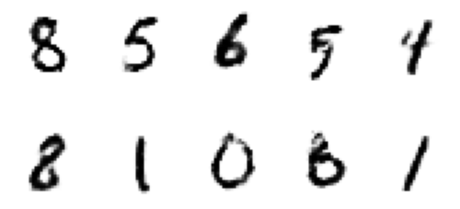

In [73]:
noise = tf.random.normal(shape = [10, noise_size])
gen_images = generator(noise)
plot_multiple_images(gen_images)